# Lecture 2.X: Black-Scholes Model

The Black-Scholes model, also called the Black-Scholes-Merton model, is a mathematical model used to calculate the fair price or theoretical value of European-style call and put options. It was developed by Fischer Black and Myron Scholes in 1973 and later revised by Robert Merton.
The Black–Scholes formula assumes that the stock price follows a random walk, that is, it moves randomly up and down over time.
$$
C(S,t) = S*N(d_1) - K*e^{-r(T-t)}*N(d_2)
$$
where:
$$
d_1 = [\ln(S/K) + (r + (\sigma^2)/2)*(T-t)] / (\sigma\sqrt{T-t})
\quad \text{and} \quad
d_2 = d_1 - \sigma \sqrt{T-t}
$$
- $C$ is the theoretical call option price
- $S$ is the current stock price
- $K$ is the option's strike price
- $r$ is the risk-free interest rate
- $T$ is the time until expiration (generally in years)
- $N(\cdot)$ is the cumulative standard normal distribution function
- $\sigma$ is the volatility of the stock

The Black-Scholes model provides a useful tool for investors and traders to determine the fair value of options and make informed trading decisions. However, it should be noted that the model has some limitations and assumptions that may not always hold true in real-world scenarios. As such, it should be used in conjunction with other analysis tools and techniques to make well-informed investment decisions.

<!-- The Solow–Swan model is a neoclassical growth model that describes an economy in which capital accumulation, population growth, and technological progress are the only factors affecting output in the long run. It is also known as the exogenous growth model, the neo-classical growth model, the Solow growth model, and the Ramsey–Cass–Koopmans growth model. The model was developed independently by Robert Solow and Trevor Swan in 1956, and superseded the Keynesian Harrod–Domar model. Due to its particularly attractive mathematical characteristics, Solow–Swan proved to be a convenient starting point for more complicated growth models. In later work, Solow and others extended the model to include uncertainty in capital and population growth, and the model has since been used extensively in growth accounting and the formulation of fiscal policy. -->

<!-- The Bellman equation writes the relationship between the value of a decision problem at two points in time. It has found application in a number of fields, including economics, machine learning and control theory. 
The equation is given by:
$$
V(x) = \max_{u \in U} \left\{ f(x,u) + \beta V(g(x,u)) \right\}
$$

where $x$ is a state variable, $u$ is an action variable, $V$ is the value function, $f$ is the reward function, $g$ is the transition function, and $\beta$ is a discount factor. The value function is the expected discount
cumulative reward for a given policy. The Bellman equation is a necessary condition for optimality in the sequential decision problem.

In the context of economics, the Bellman equation represents the relationship between the value of money and the value of the consumption decision. The value of money is the expected discounted future value of the money stock plus the expected discounted future value of the consumption decision.
Example: the value of a decision problem at time $t$ is the expected discounted future value of the decision problem at time $t+1$ plus the expected discounted future value of the decision problem at time $t+2$. -->


### Importing the required libraries

In [1]:
from SALib import ProblemSpec
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "serif"

In [5]:
def black_scholes(K, sigma, r, T, S, time_steps=1_000):
    t = np.linspace(0, T, time_steps)
    d1 = (np.log(S/K) + (r + sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    call_price = S*norm.cdf(d1) - K*np.exp(-r*(T-t))*norm.cdf(d2)
    return call_price


In [6]:
def wrapped_black_scholes(rv_params, T, S, n_steps=1_000):

    calls = np.zeros((rv_params.shape[0], n_steps))
    for i, (K, sigma, r) in enumerate(rv_params):
        calls[i] = black_scholes(K, sigma, r, T, S, n_steps)

    return calls

In [7]:
S = 100
T = 10

problem = {
    'num_vars': 3,
    'names': ['K', '\\sigma', 'r'],
    'bounds': [[80, 120], [0.05, 0.50], [0.01, 0.1]]
}

n_samples = 2**10

sp = ProblemSpec(problem)

n_samples = 2**10
sp.sample_sobol(n_samples) \
    .evaluate( lambda rv_params: wrapped_black_scholes(rv_params, T=T, S=S) ) \
    .analyze_sobol()

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])
STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])

evaluations = sp.results

C:\Users\Lamap\AppData\Local\Temp\ipykernel_17912\1194035337.py:4: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S/K) + (r + sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))


In [8]:
colors = ['red', 'blue', 'green', 'purple']

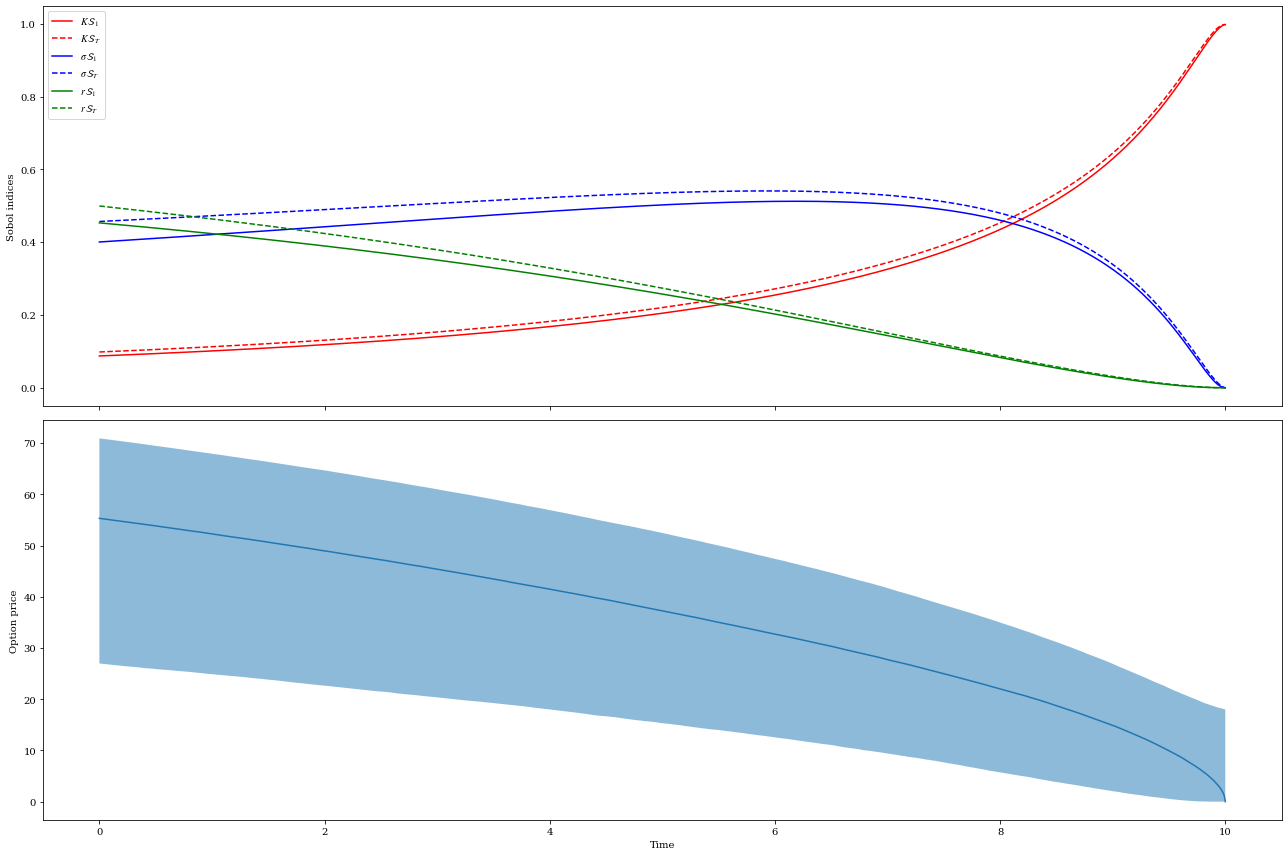

In [9]:
t = np.linspace(0, T, evaluations.shape[1])

fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(18, 12))
for i, key in enumerate(problem['names']):
    ax0.plot(t, S1s[:,i], label=rf'${key}\, \mathcal{{S}}_1$', color=colors[i])
    ax0.plot(t, STs[:,i], '--', label=rf'${key}\, \mathcal{{S}}_T$', color=colors[i])
ax0.set_ylabel('Sobol indices')
ax0.legend()

median = np.median(evaluations, axis=0)
upper = np.percentile(evaluations, 95, axis=0)
lower = np.percentile(evaluations, 5, axis=0)
ax1.plot(t, median, label='median')
ax1.fill_between(t, lower, upper, alpha=0.5, label='95% confidence interval')
ax1.set_xlabel('Time')
ax1.set_ylabel('Option price')
plt.tight_layout()
plt.show()

___
### References

[1] Black, Fischer; Scholes, Myron (1973). "The Pricing of Options and Corporate Liabilities". Journal of Political Economy. 81 (3): 637–654. doi:10.1086/260062. S2CID 1544538.

[2] Merton, Robert C. (1973). "Theory of Rational Option Pricing". Bell Journal of Economics and Management Science. 4 (1): 141–183. doi:10.2307/3003143. JSTOR 3003143.

[3] Hull, John C. (2009). Options, Futures, and Other Derivatives (7th ed.). Prentice Hall. ISBN 978-0-13-345631-8.